In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled.shape

(400, 2)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Stochastic GD

In [11]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled, y, epochs=100, batch_size=1, validation_split=0.2)
print(time.time() - start)

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5710 - loss: 0.7164 - val_accuracy: 0.6125 - val_loss: 0.6145
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8069 - loss: 0.4182 - val_accuracy: 0.7875 - val_loss: 0.4682
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8622 - loss: 0.3133 - val_accuracy: 0.8750 - val_loss: 0.3704
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8294 - loss: 0.3244 - val_accuracy: 0.8875 - val_loss: 0.3184
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8909 - loss: 0.2332 - val_accuracy: 0.9125 - val_loss: 0.2828
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8819 - loss: 0.2648 - val_accuracy: 0.9125 - val_loss: 0.2477
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8895 - loss: 0.2353 - val_accuracy: 0.9500 - val_loss: 0.2219
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9039 - loss: 0.2260 - val_accu

320/320 means we have updated the weights in each epoch 320 times!

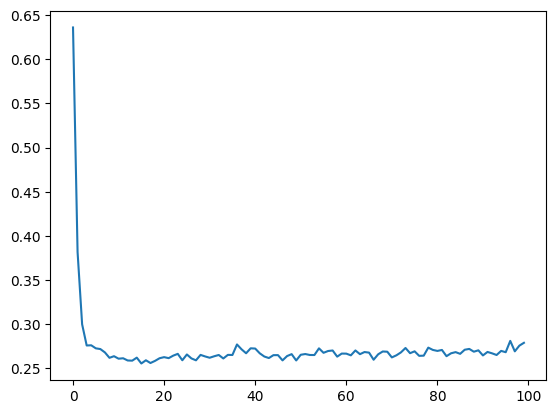

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

# Batch GD

In [15]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled, y, epochs=100, batch_size=400, validation_split=0.2)
print(time.time() - start)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8687 - loss: 0.3266 - val_accuracy: 0.9125 - val_loss: 0.4309
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8687 - loss: 0.3233 - val_accuracy: 0.9125 - val_loss: 0.4275
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8687 - loss: 0.3210 - val_accuracy: 0.9125 - val_loss: 0.4246
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8687 - loss: 0.3191 - val_accuracy: 0.9125 - val_loss: 0.4220
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8687 - loss: 0.3174 - val_accuracy: 0.9125 - val_loss: 0.4197
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8656 - loss: 0.3159 - val_accuracy: 0.9125 - val_loss: 0.4173
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8656 - loss: 0.3146 - val_accuracy: 0.9125 - val_loss: 0.4150
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8656 - loss: 0.3133 - val_accuracy: 0.9125 - val_loss

1/1 means we have updated the weights in each epoch only 1 time

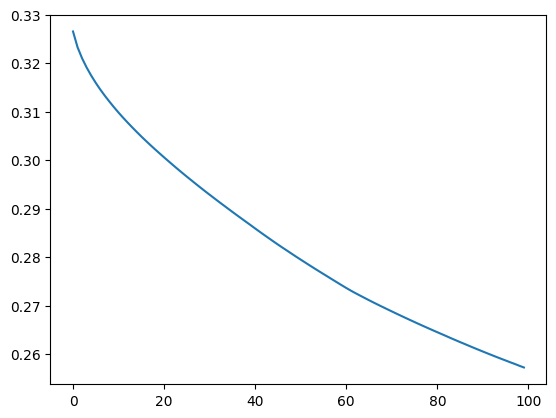

In [20]:
plt.plot(history.history['loss'])